emotion list is updated before the analysis

In [32]:
! pip install nltk

In [23]:
! pip install GetOldTweets3

In [24]:
import string
from collections import Counter
import matplotlib.pyplot as plt

In [25]:
def get_tweets():
    import GetOldTweets3 as got # library used to scrap the data from twitter 
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('Coronavirusvaccine') \
        .setSince("2020-05-01") \
        .setUntil("2020-05-31") \
        .setMaxTweets(100)
        
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets
         
    

In [26]:

text = ""

text_tweets = get_tweets()
length = len(text_tweets)

for i in range(0 , length):
    text  = text_tweets[i][0] + " " + text
    
# converting to lower case
lower_case = text.lower()

# remove puctuation

cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# splitting text into words

tokenized_words = cleaned_text.split()

In [27]:
text_tweets

[['The reason they\'re not adjusting the nubers on CV deaths & the reason they have a "liberal approach to mortality" as Dr Birx said is because the state can force you to get a #vaccine in a public health emergency https://en.m.wikipedia.org/wiki/Jacobson_v._Massachusetts #coronavirus #coronavirusvaccine #warpspeed'],
 ['प्रधानमंत्री फसल बीमा योजना किसानों को आपदा से हुए नुकसान से राहत दिलाने वाली योजना है। इसके अंतर्गत न्यूनतम प्रीमियम देकर, किसान बुआई से कटाई तक प्राकृतिक आपदाओं से हुए नुकसान का उचित भुगतान पा सकता है। और जानिए: http://www.pmfby.gov.in #PMKisan #AatmaNirbharKrishi'],
 ['The chip sector is breaking out, with or without a #CoronaVirusVaccine. $NVDA is trading near its all-time high. This is an opinion, not a BUY/SELL recommendation. #SP500 $SMH $SOXX $INTC $AMD $QCOM #chipstock #XLK #NASDAQ $SPY $SPX #DJIA $DIA #DOW #NASDAQ #COVID19'],
 [".@OxfordVacGroup changed from using a saline solution (placebo) to a meningitis vaccine during their research/'science'. Any opinio

In [28]:
from nltk.corpus import stopwords

In [29]:
import nltk
nltk.download('stopwords')
final_words = []

for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tarun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
emotion_list = []
with open('emotions.txt', 'r' ) as file:
    for line in file:
        clear_lines = line.replace('\n', '').replace(',','').replace("'", '').strip()
        word , emotion = clear_lines.split(':')
        if word in final_words:
            emotion_list.append(emotion)
            
w = Counter(emotion_list)
print(w)
        

Counter({' happy': 2, ' powerless': 1, ' entitled': 1, ' attracted': 1, ' codependent': 1, ' fearful': 1})


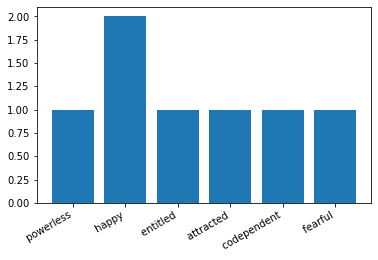

In [31]:
fig , ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()